In [98]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [99]:
from scipy.odr import *
from scipy.optimize import *
from IPython.display import display, Math, Latex

### Define basic functions to test ODR on a known linear model

These functions are going to be used to test the ODR compared to the Least Squares algorithms on a known linear model

In [100]:
def simpleLine(beta,x):
    m, b = beta[0],beta[1]
    xVals = x
    return m*x + b

In [101]:
def simpleLineErr(beta, yVals, xVals):
    m, b = beta
    return yVals - (m*xVals + b)

In [102]:
def plotData(X,Y):
    p = plot(X,Y,'r.')
    title('Test ODR')
    xlabel('x')
    ylabel('y')
    xlim(min(X)-1,max(X)+1)
    ylim(min(Y)-1,max(Y)+1)
    return p

### Create data

Create a set of data points that I know will result in an ODR calculation with known quantities

X Vals: [  0.   2.   1.   5.   6.   5.   4.   8.   9.  10.] 
Y Vals: [  0.   1.   2.   6.   5.   4.   5.   9.   8.  10.]


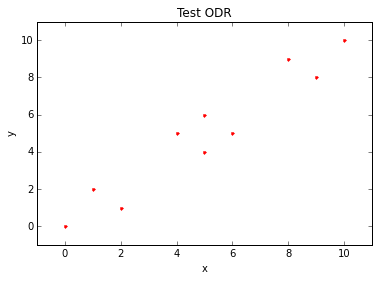

In [103]:
#X = [1,0,1,2]
#Y = [0,1,2,1]
#X = array([0.,1,2,0,1,2])
#Y = array([0.,0,1,1,2,2])
X = array([0.,2,5,5,8,10])
Y = array([0.,1,6,4,9,10])
X = array([0.,2,1,5,6,5,4,8,9,10])
Y = array([0.,1,2,6,5,4,5,9,8,10])
print "X Vals:", X, '\n', "Y Vals:", Y

plotData(X,Y)

### Run the regression algorithms

Create and Run ODR

In [90]:
initM, initB = 1., 0.
mydata = Data(X,Y)
model = Model(simpleLine)
myodr = ODR(mydata,model,beta0=[initM, initB])
myfit = myodr.run()

Run the least squares regression

In [91]:
popt, pcov, pinfodict,pmesg,pler = leastsq(simpleLineErr,(initM,initB),args=(Y, X),full_output=True)

### Plot the output of both of the regression algorithms

Plot the initial guess as a dashed green line to show how the original estimate of the the beta parameters would have resulted.  In blue is the result of ODR.  In red is the result of Least Square Regression

In [92]:
thX = linspace(min(X)-1,max(X)+1,100)
thY = simpleLine(myfit.beta,thX)
thGuess = simpleLine([initM, initB],thX)
thLS = simpleLine([popt[0], popt[1]],thX)

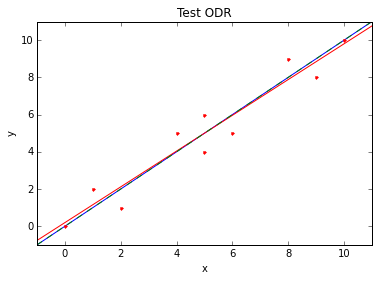

In [93]:
plot(thX,thY,'b-')
plot(thX,thLS,'r-')
plot(thX,thGuess,'g--')
plotData(X,Y)

### Print the output of the various regression algorithms

Print the output of least squares regression

In [94]:
print "LS_Slope:\t", popt[0]
print "LS_Y-Int:\t", popt[1], "\n"
e = simpleLineErr(popt,Y,X)
se = e**2
sse = sum(se)
print "Error:\t\t", e
print "Sq Err: \t", se
print "Res. Var:\t", sse/(len(e)-2)
# Calculate the Relative Standard Deviation as the Standard Deviation divided by the mean of the samples
sd = sqrt(sse/(len(e)-2))
mu_samples = mean(Y)
ls_rsd = sd/mu_samples
print "Rel. Std. Dev:\t", ls_rsd
print ""
print "Sum[e^2]:\t", sse

LS_Slope:	0.960784313725
LS_Y-Int:	0.196078431373 

Error:		[-0.19607843 -1.11764706  0.84313725  1.         -0.96078431 -1.
  0.96078431  1.11764706 -0.84313725  0.19607843]
Sq Err: 	[ 0.03844675  1.24913495  0.71088043  1.          0.9231065   1.          0.9231065
  1.24913495  0.71088043  0.03844675]
Res. Var:	0.980392156863
Rel. Std. Dev:	0.198029508595

Sum[e^2]:	7.8431372549


Print the output parameters that are found using the ODR.  In the process of doing this, also print out the calculated values of the residual variance, the sum of squared error, the sum of the squared delta (error in the x-axis) values, and the sum of the squared epsilon (error in the y-axis) values

In [95]:
print "Slope:\t\t", myfit.beta[0]
print "Y-Int:\t\t", myfit.beta[1], "\n"

print "Delta:\t\t", myfit.delta
print "Eps:\t\t", myfit.eps
print "X+delta\t\t:", myfit.xplus
print "Calc X+delta\t:", X + myfit.delta
print "Y:\t\t", myfit.y
print "Calc Y:\t\t", simpleLine(myfit.beta,X+myfit.delta), "\n"

print "Orthogonal Error Sq:\t", myfit.delta**2+myfit.eps**2
print "Orthogonal Error:\t", sqrt(myfit.delta**2+myfit.eps**2), "\n"

print "Res. Var:\t",myfit.res_var
print "Calc Res. Var:\t",sum(myfit.delta**2+myfit.eps**2)/(len(myfit.delta)-2)

rsd = sqrt(myfit.res_var)/sqrt(sum(myfit.y**2)/(len(myfit.y)-2))
print "Rel. Std. Dev:\t", rsd
print "Calc. Rel Error:\t", sqrt(myfit.sum_square/(len(myfit.delta)-2))/sqrt(sum(myfit.y**2)/(len(myfit.y)-2))
print ""

print "Sum[e^2]:\t", myfit.sum_square
print "Calc_Sum[e^2]:\t", sum(myfit.delta**2+myfit.eps**2)
print "Sum[delta^2]:\t\t", myfit.sum_square_delta
print "Calc_Sum[delta^2]:\t", sum(myfit.delta**2)
print "Sum[eps^2]:\t\t", myfit.sum_square_eps
print "Calc_Sum[eps^2]:\t", sum(myfit.eps**2)
print "Rel Error:\t",myfit.rel_error

Slope:		0.999999365819
Y-Int:		3.26334957886e-06 

Delta:		[ -1.63136564e-06  -4.99997212e-01   4.99994757e-01   4.99996382e-01
  -4.99995624e-01  -4.99995941e-01   4.99996065e-01   4.99996933e-01
  -4.99995073e-01   1.37934894e-06]
Eps:		[  1.63198497e-06   5.00005100e-01  -5.00002931e-01  -5.00003843e-01
   5.00004151e-01   5.00004468e-01  -5.00003526e-01  -5.00005194e-01
   5.00002800e-01  -1.69911578e-06]
X+delta		: [ -1.63136564e-06   1.50000279e+00   1.49999476e+00   5.49999638e+00
   5.50000438e+00   4.50000406e+00   4.49999606e+00   8.49999693e+00
   8.50000493e+00   1.00000014e+01]
Calc X+delta	: [ -1.63136564e-06   1.50000279e+00   1.49999476e+00   5.49999638e+00
   5.50000438e+00   4.50000406e+00   4.49999606e+00   8.49999693e+00
   8.50000493e+00   1.00000014e+01]
Y:		[  1.63198497e-06   1.50000510e+00   1.49999707e+00   5.49999616e+00
   5.50000415e+00   4.50000447e+00   4.49999647e+00   8.49999481e+00
   8.50000280e+00   9.99999830e+00]
Calc Y:		[  1.63198497e-06   1.5000

# Scratch Pad

The following two boxes just show that regardless of the Y values, using least squares on a linear fit, will always result in $$\sum{(Y-\bar{Y})^2}=\sum{(Y-\hat{Y})^2}+\sum{(\hat{Y}-\bar{Y})^2}$$

In [87]:
print mean(Y)
Yhat = simpleLine([popt[0],popt[1]],X)
print Yhat

6.6
[  1.30588235   3.42352941   2.36470588   6.6          7.65882353   6.6
   5.54117647   9.77647059  10.83529412  11.89411765]


In [88]:
print sum((Y-mean(Y))**2)
print sum((Y-Yhat)**2)+sum((Yhat-mean(Y))**2)

576.4
576.4


This section below here is for me to play around and see how things work and/or what things are without needing to document it in my code above

I'm playing around with what the "work" array is about.  It appears that it's an array of output values indexed by the dictionary "work_ind".  This array of output values can help debug more information if I am able to decode what all of the key values mean

In [127]:
print len(myfit.work), myfit.work_ind
print myfit.stopreason
print myfit.work[6:12]
print myfit.work[myfit.work_ind['eps']:myfit.work_ind['xplus']]

152 {'tau': 37, 'rnors': 41, 'qraux': 61, 'prers': 42, 'wssep': 33, 'diff': 84, 'rcond': 34, 'delts': 87, 'wrk7': 146, 'fjacd': 112, 'tt': 105, 'partl': 43, 's': 55, 'fjacb': 71, 'rvar': 30, 'wrk6': 134, 'u': 63, 'sstol': 44, 'wrk5': 133, 'wrk2': 124, 'wrk3': 130, 'wrk1': 118, 'fs': 65, 'wssde': 32, 'taufc': 45, 'pnorm': 40, 'olmav': 36, 'we1': 83, 'delta': 0, 'deltn': 93, 'alpha': 38, 'ssf': 59, 'omega': 111, 'wrk4': 132, 'fn': 18, 'betac': 49, 'betao': 47, 'betan': 53, 'eps': 6, 'xplus': 12, 'ss': 57, 'wss': 31, 'eta': 35, 'betas': 51, 't': 99, 'actrs': 39, 'apsma': 46, 'sd': 26}
['Sum of squares convergence']
[  5.94737160e-05   5.00060432e-01   5.00000981e-01  -5.00000967e-01
  -5.00060450e-01  -5.94679904e-05]
[  5.94737160e-05   5.00060432e-01   5.00000981e-01  -5.00000967e-01
  -5.00060450e-01  -5.94679904e-05]


In [22]:
foo = array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0.45, 0.5, 0.6, 0.6, 0.3, 0.7, 0.8])
print foo

[ 1.    1.    1.    1.    1.    1.    1.    1.    1.    0.45  0.5   0.6
  0.6   0.3   0.7   0.8 ]


In [23]:
print foo[foo<0.5]

[ 0.45  0.3 ]
